<a href="https://colab.research.google.com/github/Paulie-Aditya/Machine-Learning-Projects/blob/main/Handwritten_Digit_Classification_using_ANN_%7C_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [18]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
X_train.shape
# 3d array of all pixel value
# Each image is represented as a 28*28 numpy array

(60000, 28, 28)

In [20]:
y_train
# Shows the digit the image is showing

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

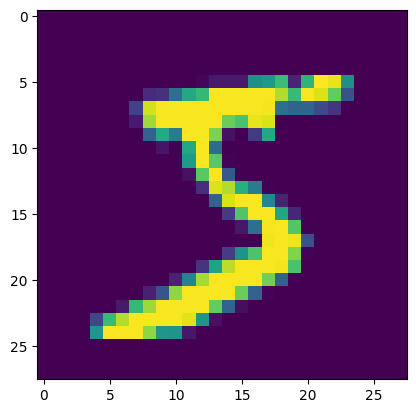

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [22]:
# sort of one hot encoding the training data set
# we are converting the values (by dividing all values by 255) so that all values are in range 0 to 1

X_train = X_train/255
X_test = X_test/255

In [23]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
# convert the row by row value (2D Array) ([28][28]) to 1D Array ([28*28]) to feed to input layer of NN
# We can do this by flattening

In [42]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation='softmax')) # When output contains more than 1 output use softmax

In [43]:
model.summary()

#params = input nodes* output nodes + output nodes

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train, epochs = 25, validation_split =0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2774 - accuracy: 0.9184 - val_loss: 0.1375 - val_accuracy: 0.9586
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1200 - accuracy: 0.9639 - val_loss: 0.1194 - val_accuracy: 0.9651
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0815 - accuracy: 0.9752 - val_loss: 0.0990 - val_accuracy: 0.9705
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.0941 - val_accuracy: 0.9729
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0490 - accuracy: 0.9840 - val_loss: 0.0912 - val_accuracy: 0.9728
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0911 - val_accuracy: 0.9748
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.1025 - val_accuracy:

In [46]:
y_prob = model.predict(X_test)
# determines probability of each digit

313/313 [==============================] - 1s 2ms/step


In [47]:
y_pred = y_prob.argmax(axis = 1)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9768

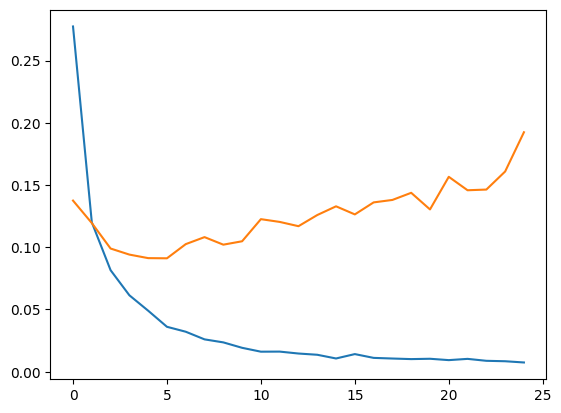

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

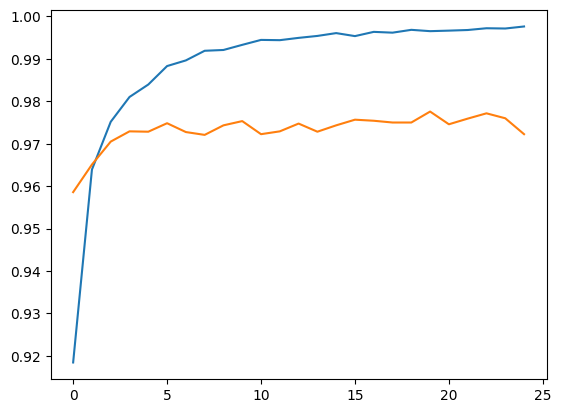

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

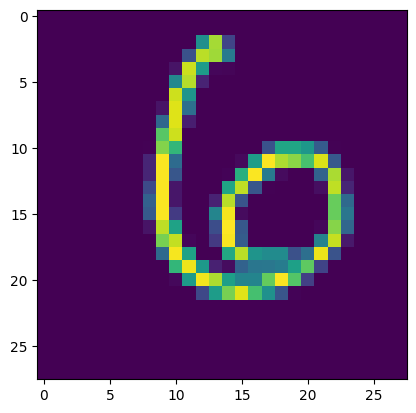

In [53]:
plt.imshow(X_test[100])

In [54]:
model.predict(X_test[100].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 39ms/step


array([6])